In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
df_coupon = pd.read_csv('coupon.csv')
df_transaction = pd.read_csv('first_transaction.csv')
df_reservation = pd.read_csv('reservations.csv')


In [ ]:
df_coupon.head()

,reservation_id,user_id,gross_rev,net_rev,promo
0,3304,31700,990.0,495.0,JOMTREVO
1,3307,31668,360.0,180.0,JOMTREVO
2,3311,31702,400.0,200.0,JOMTREVO
3,3331,31742,121.0,66.0,JOMTREVO
4,3332,31701,215.0,117.5,JOMTREVO


In [ ]:
df_transaction.head()

,user_id,first_return_date,first_rid,signupdate
0,31668,6/9/20 16:41,3307,6/9/2020
1,31670,6/11/20 14:58,3343,6/9/2020
2,31672,6/22/20 20:35,3762,6/9/2020
3,31679,8/8/20 16:19,9897,6/9/2020
4,31681,6/19/20 13:41,3596,6/9/2020


In [ ]:
df_reservation.head()

,reservation_id,user_id,return_date,week,resv_start_day,resv_start_hour,city,car_name,duration,age
0,3304,31700,6/18/20 18:30,2020-25,Tuesday,18,KV,CITY 1.5L S,9,30
1,3307,31668,6/15/20 12:00,2020-25,Friday,12,KV,ARUZ-1500X (AUTO),3,38
2,3311,31702,6/15/20 7:00,2020-25,Saturday,7,KV,city,2,32
3,3331,31742,6/14/20 8:30,2020-24,Saturday,8,KV,HR-V 1.8L S,1,30
4,3332,31701,6/14/20 20:00,2020-24,Friday,16,KV,Myvi EZI 1.3,3,27


In [ ]:
# Checking Null Values

In [ ]:
df_coupon.isnull().sum()

reservation_id       0
user_id              0
gross_rev            0
net_rev              0
promo             1337
dtype: int64

In [ ]:
df_transaction.isnull().sum()

user_id              0
first_return_date    0
first_rid            0
signupdate           0
dtype: int64

In [ ]:
df_reservation.isnull().sum()

reservation_id     0
user_id            0
return_date        0
week               0
resv_start_day     0
resv_start_hour    0
city               0
car_name           0
duration           0
age                0
dtype: int64

In [ ]:
df_coupon = df_coupon.dropna()

In [ ]:
df_coupon.isnull().sum()

reservation_id    0
user_id           0
gross_rev         0
net_rev           0
promo             0
dtype: int64

In [ ]:
df_transaction=df_transaction.rename(columns={"first_rid": "reservation_id"})

In [ ]:
df_transaction.columns

Index(['user_id', 'first_return_date', 'reservation_id', 'signupdate'], dtype='object')

In [ ]:
df_reservation.shape, df_transaction.shape, df_coupon.shape

((9149, 10), (5904, 4), (7812, 5))

In [ ]:
(7080 - 3245)/5904

0.649559620596206

In [ ]:
# merge datasets
df_reservation= df_reservation.merge(df_transaction[['user_id', 'first_return_date', 'reservation_id', 'signupdate']],how="left", on=['reservation_id'])

In [ ]:
df_reservation.shape

(9149, 13)

In [ ]:
df_reservation.tail()

,reservation_id,user_id_x,return_date,week,resv_start_day,resv_start_hour,city,car_name,duration,age,user_id_y,first_return_date,signupdate
9144,75547,47465,4/5/21 8:00,2021-14,Sunday,8,KV,Persona 1.6 AT,1,32,NaN,NaN,NaN
9145,75550,72306,4/4/21 23:30,2021-13,Saturday,23,KV,D MAX 4x2,1,27,NaN,NaN,NaN
9146,75582,40440,4/5/21 12:00,2021-14,Sunday,12,KV,Myvi 1.5,1,31,NaN,NaN,NaN
9147,75585,36536,4/5/21 9:30,2021-14,Sunday,9,KV,ARUZ-1500 X (AUTO),2,33,36536.0,4/3/21 20:53,7/11/2020
9148,75637,64967,4/4/21 23:30,2021-13,Sunday,6,KV,Axia,1,18,64967.0,4/3/21 23:01,8/29/2020


In [ ]:
df_reservation= df_reservation.merge(df_coupon,how="left", on=['reservation_id'])

In [ ]:
df_reservation.shape

(9149, 17)

In [ ]:
df_reservation.columns

Index(['reservation_id', 'user_id_x', 'return_date', 'week', 'resv_start_day',
       'resv_start_hour', 'city', 'car_name', 'duration', 'age', 'user_id_y',
       'first_return_date', 'signupdate', 'user_id', 'gross_rev', 'net_rev',
       'promo'],
      dtype='object')

In [ ]:
no = df_reservation[df_reservation['user_id_y'].isnull()]

In [ ]:
no.shape

(3245, 17)

In [ ]:
df_features_overall = df_reservation[['reservation_id', 'user_id_x','city', 'car_name', 'return_date','first_return_date', 'signupdate', 
       'resv_start_hour',  'duration', 'age','gross_rev', 'net_rev',
       'promo']]

In [ ]:
df_features_overall.head()

,reservation_id,user_id_x,city,car_name,return_date,first_return_date,signupdate,resv_start_hour,duration,age,gross_rev,net_rev,promo
0,3304,31700,KV,CITY 1.5L S,6/18/20 18:30,6/9/20 15:19,6/9/2020,18,9,30,990.0,495.0,JOMTREVO
1,3307,31668,KV,ARUZ-1500X (AUTO),6/15/20 12:00,6/9/20 16:41,6/9/2020,12,3,38,360.0,180.0,JOMTREVO
2,3311,31702,KV,city,6/15/20 7:00,6/9/20 18:17,6/9/2020,7,2,32,400.0,200.0,JOMTREVO
3,3331,31742,KV,HR-V 1.8L S,6/14/20 8:30,6/10/20 13:36,6/10/2020,8,1,30,121.0,66.0,JOMTREVO
4,3332,31701,KV,Myvi EZI 1.3,6/14/20 20:00,6/10/20 15:04,6/9/2020,16,3,27,215.0,117.5,JOMTREVO


In [ ]:
df_features_overall=df_features_overall.rename(columns={"user_id_x": "user_id"})

In [ ]:
df_features_overall=df_features_overall.fillna(0)

In [ ]:
df_features_overall.dtypes

reservation_id         int64
user_id                int64
city                  object
car_name              object
return_date           object
first_return_date     object
signupdate            object
resv_start_hour        int64
duration               int64
age                    int64
gross_rev            float64
net_rev              float64
promo                 object
dtype: object

In [ ]:
df_features_overall['cost'] = df_features_overall['gross_rev']- df_features_overall['net_rev']

In [ ]:
df_features_overall[["return_date", "first_return_date"]] = df_features_overall[["return_date", "first_return_date"]].apply(pd.to_datetime)

In [ ]:
df_features_overall["signupdate"]= df_features_overall["signupdate"].apply(pd.to_datetime)

In [ ]:
df_features_overall['lagtime'] = (df_features_overall['first_return_date'] - df_features_overall['signupdate']).dt.days

In [ ]:
df_features_overall['npm'] = ((df_features_overall['net_rev']-df_features_overall['cost'])/df_features_overall['net_rev'])*100

In [ ]:
df_features_overall.head(10)

,reservation_id,user_id,city,car_name,return_date,first_return_date,signupdate,resv_start_hour,duration,age,gross_rev,net_rev,promo,cost,lagtime,npm
0,3304,31700,KV,CITY 1.5L S,2020-06-18 18:30:00,2020-06-09 15:19:00,2020-06-09,18,9,30,990.0,495.0,JOMTREVO,495.0,0,0.000000
1,3307,31668,KV,ARUZ-1500X (AUTO),2020-06-15 12:00:00,2020-06-09 16:41:00,2020-06-09,12,3,38,360.0,180.0,JOMTREVO,180.0,0,0.000000
2,3311,31702,KV,city,2020-06-15 07:00:00,2020-06-09 18:17:00,2020-06-09,7,2,32,400.0,200.0,JOMTREVO,200.0,0,0.000000
3,3331,31742,KV,HR-V 1.8L S,2020-06-14 08:30:00,2020-06-10 13:36:00,2020-06-10,8,1,30,121.0,66.0,JOMTREVO,55.0,0,16.666667
4,3332,31701,KV,Myvi EZI 1.3,2020-06-14 20:00:00,2020-06-10 15:04:00,2020-06-09,16,3,27,215.0,117.5,JOMTREVO,97.5,1,17.021277
5,3334,31760,KV,Axia 1.0 AV,2020-06-12 10:00:00,2020-06-10 16:34:00,2020-06-10,10,1,35,75.0,37.5,JOMTREVO,37.5,0,0.000000
6,3342,31801,KV,Alza,2020-06-16 08:30:00,2020-06-11 14:44:00,2020-06-11,8,4,43,636.0,318.0,JOMTREVO,318.0,0,0.000000
7,3343,31670,KV,Axia-1000 SE,2020-06-15 12:00:00,2020-06-11 14:58:00,2020-06-09,18,4,31,330.0,180.0,JOMTREVO,150.0,2,16.666667
8,3347,31753,KV,Aruz 1.5 X,2020-06-13 07:30:00,2020-06-11 18:15:00,2020-06-10,7,1,31,220.0,110.0,JOMTREVO,110.0,1,0.000000
9,3379,31853,KV,Exora,2020-06-18 23:30:00,2020-06-12 11:35:00,2020-06-12,15,7,49,840.0,420.0,JOMTREVO,420.0,0,0.000000


In [ ]:
# Aggregate

In [ ]:
df_features_overall = df_features_overall.groupby(['user_id','age','city','car_name']).agg({
    'cost':'sum',
    'gross_rev':'sum',
    'net_rev':'sum',
    'npm':'sum',
    'lagtime':'sum',
    'reservation_id':'nunique',
    'promo':'nunique'
    }).reset_index()

In [ ]:
df_features_overall.shape

(7991, 11)

In [ ]:
df_features_overall.head()

,user_id,age,city,car_name,cost,gross_rev,net_rev,npm,lagtime,reservation_id,promo
0,31668,38,KV,ARUZ-1500X (AUTO),180.0,360.0,180.0,0.000000,0,1,1
1,31670,31,KV,Axia-1000 SE,150.0,330.0,180.0,16.666667,2,1,1
2,31672,25,KV,CITY 1.5L S,110.0,220.0,110.0,0.000000,13,1,1
3,31679,26,KV,starex,80.0,160.0,80.0,0.000000,60,1,1
4,31681,28,KV,HR-V 1.8L S,110.0,242.0,132.0,16.666667,10,1,1


In [ ]:
df_features_overall['acr'] = df_features_overall['promo']/df_features_overall['gross_rev']*100

In [ ]:
df_features_overall.head()

,user_id,age,city,car_name,cost,gross_rev,net_rev,npm,lagtime,reservation_id,promo,acr
0,31668,38,KV,ARUZ-1500X (AUTO),180.0,360.0,180.0,0.000000,0,1,1,0.277778
1,31670,31,KV,Axia-1000 SE,150.0,330.0,180.0,16.666667,2,1,1,0.303030
2,31672,25,KV,CITY 1.5L S,110.0,220.0,110.0,0.000000,13,1,1,0.454545
3,31679,26,KV,starex,80.0,160.0,80.0,0.000000,60,1,1,0.625000
4,31681,28,KV,HR-V 1.8L S,110.0,242.0,132.0,16.666667,10,1,1,0.413223


In [ ]:
df_features_overall['agbs'] = df_features_overall['gross_rev']/df_features_overall['reservation_id']

In [ ]:
df_features_overall.tail()

,user_id,age,city,car_name,cost,gross_rev,net_rev,npm,lagtime,reservation_id,promo,acr,agbs
7986,84768,21,KV,JAZZ S,83.0,83.0,0.0,-inf,1,1,1,1.204819,83.0
7987,84771,42,JB,SAGA 1.3 CVT,70.0,100.0,30.0,-133.333333,6,1,1,1.000000,100.0
7988,84774,24,PG,Bezza 1.3 X,104.3,149.0,44.7,-133.333333,1,1,1,0.671141,149.0
7989,84774,24,PG,Swift GLX A/T,70.0,70.0,0.0,-inf,0,1,1,1.428571,70.0
7990,84777,31,PG,Vios,77.0,110.0,33.0,-133.333333,80,1,1,0.909091,110.0


In [ ]:
df_features_overall.isnull().sum().sum()

0

In [ ]:
df_features_overall = df_features_overall.set_index('user_id')

In [ ]:
df_features_overall.columns

Index(['age', 'city', 'car_name', 'cost', 'gross_rev', 'net_rev', 'npm',
       'lagtime', 'reservation_id', 'promo', 'acr', 'agbs'],
      dtype='object')

In [ ]:
df_features_overall=df_features_overall.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [ ]:
df_features_overall.shape

(7080, 12)

In [ ]:
df_features=df_features_overall[['age',
       'lagtime', 'reservation_id', 'promo', 'npm', 'acr', 'agbs']]

In [ ]:
df_features.head()

,age,lagtime,reservation_id,promo,npm,acr,agbs
user_id,,,,,,,
31668,38,0,1,1,0.000000,0.277778,360.0
31670,31,2,1,1,16.666667,0.303030,330.0
31672,25,13,1,1,0.000000,0.454545,220.0
31679,26,60,1,1,0.000000,0.625000,160.0
31681,28,10,1,1,16.666667,0.413223,242.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# creating a copy to keep original df as is for later
df_clust = df_features.copy()

In [ ]:
df_clust.columns

Index(['age', 'lagtime', 'reservation_id', 'promo', 'npm', 'acr', 'agbs'], dtype='object')

In [ ]:
cols_scale=['age', 'lagtime', 'reservation_id', 'promo','npm', 'acr', 'agbs']

In [ ]:
np.any(np.isnan(df_clust))

False

In [ ]:
np.all(np.isfinite(df_clust))

True

In [ ]:
df_clust.describe()

,age,lagtime,reservation_id,promo,npm,acr,agbs
count,7080.000000,7080.000000,7080.0,7080.0,7080.000000,7080.000000,7080.000000
mean,30.631356,22.528531,1.0,1.0,-495.403165,0.548956,324.963588
std,9.570002,45.979488,0.0,0.0,1084.990991,0.398732,312.739798
min,18.000000,0.000000,1.0,1.0,-14800.000000,0.027632,20.000000
25%,23.000000,0.000000,1.0,1.0,-233.333333,0.257566,135.000000
50%,28.000000,2.000000,1.0,1.0,0.000000,0.419289,238.500000
75%,35.000000,18.000000,1.0,1.0,0.000000,0.740741,388.250000
max,80.000000,279.000000,1.0,1.0,792.857143,5.000000,3619.000000


In [ ]:
scaler = MinMaxScaler().fit(df_clust[cols_scale])
df_clust[cols_scale] = scaler.transform(df_clust[cols_scale])

100%|██████████| 19/19 [00:33<00:00,  1.78s/it]


Text(0, 0.5, 'Inertia score (SSE)')

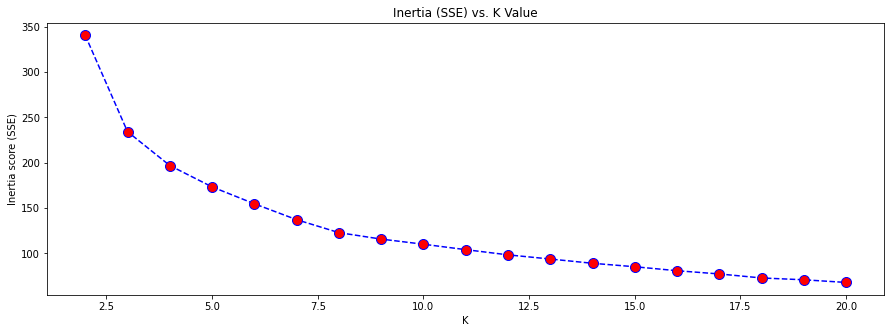

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import silhouette_score as ss
from sklearn.cluster import KMeans

k1 = []
sscore1 = []
inertia_s1 = []

for i in tqdm(range(2,21)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i,random_state=125,max_iter=100).fit(df_clust)
    sscore1.append(ss(df_clust,kmeans1.labels_))
    inertia_s1.append(kmeans1.inertia_)

# plot
plt.figure(figsize=(15,5))
plt.plot(k1,inertia_s1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

Text(0, 0.5, 'SS')

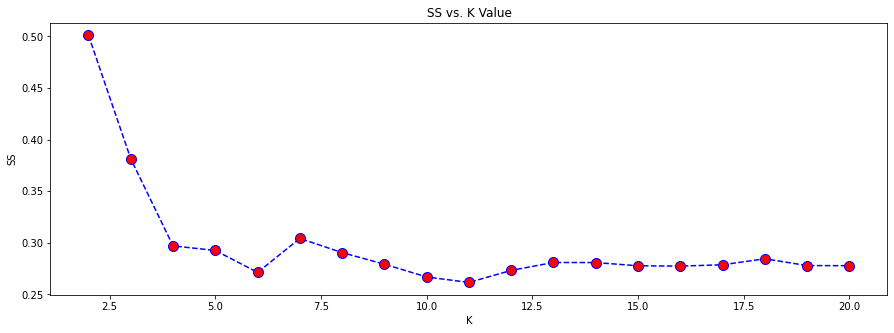

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(k1,sscore1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('SS vs. K Value')
plt.xlabel('K')
plt.ylabel('SS')

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=100).fit(df_clust)
sscore = ss(df_clust,kmeans.labels_)
inertia= kmeans.inertia_

print('sscore',sscore)
print('inertia',inertia)

sscore 0.2970119116431085
inertia 196.97655629930225


In [ ]:
df_clust.shape

(7080, 7)

In [ ]:
df_features_overall['cluster_ids'] = kmeans.labels_

In [ ]:
df_features_overall.tail(10)

,age,city,car_name,cost,gross_rev,net_rev,npm,lagtime,reservation_id,promo,acr,agbs,cluster_ids
user_id,,,,,,,,,,,,,
84747,20,KV,New Alza 1.5 AV (Full Spec),76.3,109.0,32.7,-133.333333,3,1,1,0.917431,109.0,2
84750,21,KV,Saga,70.0,100.0,30.0,-133.333333,3,1,1,1.000000,100.0,2
84751,25,KV,MYVI - 1300 G (AUTO),59.5,85.0,25.5,-133.333333,0,1,1,1.176471,85.0,2
84756,20,KV,saga,66.5,95.0,28.5,-133.333333,4,1,1,1.052632,95.0,2
84757,21,KV,New Bezza 1.3 AV (Full Spec),69.3,99.0,29.7,-133.333333,2,1,1,1.010101,99.0,2
84760,25,KV,Iriz 1.3,49.0,70.0,21.0,-133.333333,2,1,1,1.428571,70.0,2
84768,21,KV,Axia 1.0 AV,52.5,75.0,22.5,-133.333333,0,1,1,1.333333,75.0,2
84771,42,JB,SAGA 1.3 CVT,70.0,100.0,30.0,-133.333333,6,1,1,1.000000,100.0,1
84774,24,PG,Bezza 1.3 X,104.3,149.0,44.7,-133.333333,1,1,1,0.671141,149.0,2


In [ ]:
df_features_overall.describe()

,age,cost,gross_rev,net_rev,npm,lagtime,reservation_id,promo,acr,agbs,cluster_ids
count,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.0,7080.0,7080.000000,7080.000000,7080.000000
mean,30.631356,174.724048,324.963588,150.239540,-495.403165,22.528531,1.0,1.0,0.548956,324.963588,1.387712
std,9.570002,138.935783,312.739798,213.520184,1084.990991,45.979488,0.0,0.0,0.398732,312.739798,1.008561
min,18.000000,0.000000,20.000000,5.000000,-14800.000000,0.000000,1.0,1.0,0.027632,20.000000,0.000000
25%,23.000000,74.500000,135.000000,25.500000,-233.333333,0.000000,1.0,1.0,0.257566,135.000000,0.000000
50%,28.000000,130.000000,238.500000,80.000000,0.000000,2.000000,1.0,1.0,0.419289,238.500000,2.000000
75%,35.000000,238.000000,388.250000,192.000000,0.000000,18.000000,1.0,1.0,0.740741,388.250000,2.000000
max,80.000000,1490.000000,3619.000000,3119.000000,792.857143,279.000000,1.0,1.0,5.000000,3619.000000,3.000000


In [ ]:
df_profile_overall = df_features_overall.describe().T

In [ ]:
df_profile_overall

,count,mean,std,min,25%,50%,75%,max
age,7080.0,30.631356,9.570002,18.000000,23.000000,28.000000,35.000000,80.000000
cost,7080.0,174.724048,138.935783,0.000000,74.500000,130.000000,238.000000,1490.000000
gross_rev,7080.0,324.963588,312.739798,20.000000,135.000000,238.500000,388.250000,3619.000000
net_rev,7080.0,150.239540,213.520184,5.000000,25.500000,80.000000,192.000000,3119.000000
npm,7080.0,-495.403165,1084.990991,-14800.000000,-233.333333,0.000000,0.000000,792.857143
lagtime,7080.0,22.528531,45.979488,0.000000,0.000000,2.000000,18.000000,279.000000
reservation_id,7080.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
promo,7080.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
acr,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
agbs,7080.0,324.963588,312.739798,20.000000,135.000000,238.500000,388.250000,3619.000000


In [ ]:
df_cluster_summary = df_features_overall.groupby('cluster_ids').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

In [ ]:
df_cluster_summary

cluster_ids,column,metric,0,1,2,3
0,age,count,2055.000000,930.000000,3390.000000,705.000000
1,age,mean,32.624818,49.189247,24.546608,29.598582
2,age,std,4.984188,7.546818,3.806865,7.590496
3,age,min,19.000000,38.000000,18.000000,18.000000
4,age,25%,29.000000,43.000000,22.000000,23.000000
5,age,50%,33.000000,48.000000,24.000000,28.000000
6,age,75%,36.000000,54.000000,27.000000,34.000000
7,age,max,53.000000,80.000000,37.000000,59.000000
8,cost,count,2055.000000,930.000000,3390.000000,705.000000
9,cost,mean,283.589465,161.975860,123.769192,119.226667


In [ ]:
df_cluster_summary['Metric'] = df_cluster_summary.apply(
    lambda row: 'median' if row['metric']=='50%' else row['metric'],
    axis=1)
df_cluster_summary = df_cluster_summary.set_index('column')
df_cluster_summary = df_cluster_summary.drop('metric', axis=1)

In [ ]:
df_cluster_summary

cluster_ids,0,1,2,3,Metric
column,,,,,
age,2055.000000,930.000000,3390.000000,705.000000,count
age,32.624818,49.189247,24.546608,29.598582,mean
age,4.984188,7.546818,3.806865,7.590496,std
age,19.000000,38.000000,18.000000,18.000000,min
age,29.000000,43.000000,22.000000,23.000000,25%
age,33.000000,48.000000,24.000000,28.000000,median
age,36.000000,54.000000,27.000000,34.000000,75%
age,53.000000,80.000000,37.000000,59.000000,max
cost,2055.000000,930.000000,3390.000000,705.000000,count


In [ ]:
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index

In [ ]:
df_profile

,0,1,2,3,Metric,count,mean,std,min,25%,50%,75%,max
acr,2055.000000,930.000000,3390.000000,705.000000,count,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,0.252005,0.592393,0.706329,0.600512,mean,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,0.152499,0.413084,0.406693,0.357242,std,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,0.027632,0.044883,0.115340,0.062500,min,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,0.131149,0.286533,0.401606,0.305810,25%,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,0.224719,0.476190,0.625000,0.505051,median,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,0.333333,0.779736,0.909091,0.869565,75%,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
acr,1.010101,2.857143,5.000000,1.666667,max,7080.0,0.548956,0.398732,0.027632,0.257566,0.419289,0.740741,5.000000
agbs,2055.000000,930.000000,3390.000000,705.000000,count,7080.0,324.963588,312.739798,20.000000,135.000000,238.500000,388.250000,3619.000000
agbs,582.942920,283.793548,192.057227,266.372340,mean,7080.0,324.963588,312.739798,20.000000,135.000000,238.500000,388.250000,3619.000000


In [ ]:
df_profile.to_csv('cluster-analysis_1.csv')

In [ ]:
df_features_overall.to_csv('overall-clusters_1.csv')

In [ ]:
## importing libraries

import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

## importing datasets

df_coupon = pd.read_csv('coupon.csv')
df_transaction = pd.read_csv('first_transaction.csv')
df_reservation = pd.read_csv('reservations.csv')

## Checking Null

df_coupon.isnull().sum()
df_transaction.isnull().sum()
df_reservation.isnull().sum()

## Dropping Null

df_coupon = df_coupon.dropna()

##rename
df_transaction=df_transaction.rename(columns={"first_rid": "reservation_id"})

## Shape checking
df_reservation.shape, df_transaction.shape, df_coupon.shape

## merge datasets
df_reservation= df_reservation.merge(df_transaction[['user_id', 'first_return_date', 'reservation_id', 'signupdate']],how="left", on=['reservation_id'])
df_reservation= df_reservation.merge(df_coupon,how="left", on=['reservation_id'])

df_features_overall = df_reservation[['reservation_id', 'user_id_x','city', 'car_name', 'return_date','first_return_date', 'signupdate', 
       'resv_start_hour',  'duration', 'age','gross_rev', 'net_rev',
       'promo']]

df_features_overall=df_features_overall.rename(columns={"user_id_x": "user_id"})
df_features_overall=df_features_overall.fillna(0)

df_features_overall.dtypes

## Finding Cost
df_features_overall['cost'] = df_features_overall['gross_rev']- df_features_overall['net_rev']

## Changing dtypes
df_features_overall[["return_date", "first_return_date"]] = df_features_overall[["return_date", "first_return_date"]].apply(pd.to_datetime)
df_features_overall["signupdate"]= df_features_overall["signupdate"].apply(pd.to_datetime)

## Finding Lagtime(day)
df_features_overall['lagtime'] = (df_features_overall['first_return_date'] - df_features_overall['signupdate']).dt.days

## Finding Net Profit Margin (npm)
df_features_overall['npm'] = ((df_features_overall['net_rev']-df_features_overall['cost'])/df_features_overall['net_rev'])*100


## Aggregate
df_features_overall = df_features_overall.groupby(['user_id','age','city','car_name']).agg({
    'cost':'sum',
    'gross_rev':'sum',
    'net_rev':'sum',
    'npm':'sum',
    'lagtime':'sum',
    'reservation_id':'nunique',
    'promo':'nunique'
    }).reset_index()

## Finding ACR (Average Coupon Rate)
df_features_overall['acr'] = df_features_overall['promo']/df_features_overall['gross_rev']*100

## Finding AGBS (Average Gross Basket Size)
df_features_overall['agbs'] = df_features_overall['gross_rev']/df_features_overall['reservation_id']

df_features_overall = df_features_overall.set_index('user_id')

## Cleaning NaN and inf rows
df_features_overall=df_features_overall.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

## Selecting Features for Clustering Algorithm
df_features=df_features_overall[['age',
       'lagtime', 'reservation_id', 'promo', 'npm', 'acr', 'agbs']]

## Selecting necessary Library for Scaling
from sklearn.preprocessing import MinMaxScaler

# creating a copy to keep original df as is for later
df_clust = df_features.copy()
cols_scale=['age', 'lagtime', 'reservation_id', 'promo','npm', 'acr', 'agbs']
np.any(np.isnan(df_clust))
np.all(np.isfinite(df_clust))
df_clust.describe()
scaler = MinMaxScaler().fit(df_clust[cols_scale])
df_clust[cols_scale] = scaler.transform(df_clust[cols_scale])

## Selecting Necessary Libraries for K-Means CLustering
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import silhouette_score as ss
from sklearn.cluster import KMeans

k1 = []
sscore1 = []
inertia_s1 = []

for i in tqdm(range(2,21)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i,random_state=125,max_iter=100).fit(df_clust)
    sscore1.append(ss(df_clust,kmeans1.labels_))
    inertia_s1.append(kmeans1.inertia_)

# plot
plt.figure(figsize=(15,5))
plt.plot(k1,inertia_s1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

plt.figure(figsize=(15,5))
plt.plot(k1,sscore1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('SS vs. K Value')
plt.xlabel('K')
plt.ylabel('SS')


## Selecting 4 cluster after using elbow method and applying
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=100).fit(df_clust)
sscore = ss(df_clust,kmeans.labels_)
inertia= kmeans.inertia_

## Printing ss SSscore & inertia
print('sscore',sscore)
print('inertia',inertia)

## Attaching the labels no to original dataset
df_features_overall['cluster_ids'] = kmeans.labels_

df_profile_overall = df_features_overall.describe().T

## Including the metric with each cluster
df_cluster_summary = df_features_overall.groupby('cluster_ids').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})
df_cluster_summary['Metric'] = df_cluster_summary.apply(
    lambda row: 'median' if row['metric']=='50%' else row['metric'],
    axis=1)
df_cluster_summary = df_cluster_summary.set_index('column')
df_cluster_summary = df_cluster_summary.drop('metric', axis=1)

df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index

## Finally downloading the csvs of the desired output
df_profile.to_csv('cluster-analysis_1.csv')
df_features_overall.to_csv('overall-clusters_1.csv')




In [ ]:
# plot
plt.figure(figsize=(15,5))
plt.plot(k1,inertia_s1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

plt.figure(figsize=(15,5))
plt.plot(k1,sscore1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('SS vs. K Value')
plt.xlabel('K')
plt.ylabel('SS')


## Selecting 4 cluster after using elbow method and applying
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=100).fit(df_clust)
sscore = ss(df_clust,kmeans.labels_)
inertia= kmeans.inertia_

## Printing ss SSscore & inertia
print('sscore',sscore)
print('inertia',inertia)

## Attaching the labels no to original dataset
df_features_overall['cluster_ids'] = kmeans.labels_

df_profile_overall = df_features_overall.describe().T

In [ ]:
## Including the metric with each cluster
df_cluster_summary = df_features_overall.groupby('cluster_ids').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})
df_cluster_summary['Metric'] = df_cluster_summary.apply(
    lambda row: 'median' if row['metric']=='50%' else row['metric'],
    axis=1)
df_cluster_summary = df_cluster_summary.set_index('column')
df_cluster_summary = df_cluster_summary.drop('metric', axis=1)

df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index

## Finally downloading the csvs of the desired output
df_profile.to_csv('cluster-analysis_1.csv')
df_features_overall.to_csv('overall-clusters_1.csv')
